<a href="https://colab.research.google.com/github/yuruojie777/NLP/blob/main/COMP5046_Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 05

# Preprocessing

Text preprocessing is an important step for natural language processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better. It is important to understand what each preprocessing method does in order to help decide if it is appropriate for your particular task.

## Text Wrangling

Text wrangling is converting/gathering/extracting formatted text from raw data. 

For example, **HTML** does not include only content text. Even when you extract only the text from **HTML**, it is not all meaningful (e.g. it can include advertisements).

Have a look at the [news article](https://www.smh.com.au/national/nsw/macquarie-uni-suspends-teaching-for-10-days-to-move-learning-online-20200317-p54avs.html). We might be only interested in getting the headline and body of the article.

The following code removes some irrelevant tags (i.e. script, style, link, etc.) and displays the remaining tags. We will mainly utilise two packages: 


*   `urllib`: is a package that collects several modules for working with URLs. We will use `urllib.request` for opening and reading URLs (See details at [urllib.request](https://docs.python.org/3/library/urllib.request.html#module-urllib.request)). 
*   `BeautifulSoup`: Beautiful Soup is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree (See details at [BeautifulSoup](https://pypi.org/project/beautifulsoup4/)).


    


In [ ]:
import urllib 
from bs4 import BeautifulSoup

url = "https://www.smh.com.au/national/nsw/macquarie-uni-suspends-teaching-for-10-days-to-move-learning-online-20200317-p54avs.html"
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html)

# remove irrelevant tags (script, style, link, etc.)
for script in soup(["script", "style", "link", "head", "noscript"]):
    script.extract()    # rip it out, i.e remove the tag from the tree

# The get_text() returns all the human-readable text beneath the tag as string
text = soup.get_text()
#print(text) # you can uncomment to have a look the returned text

# The prettify() method will turn a Beautiful Soup parse tree into a nicely formatted Unicode string, with a separate line for each tag and each string
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <body>
  <div data-reactroot="" id="app">
   <div aria-atomic="true" aria-live="off" class="_2O3rv" id="page_announcer" tabindex="-1">
    University of Sydney to move fully online while Macquarie cancels classes
   </div>
   <div>
   </div>
   <div class="_2lciU" role="">
    <svg aria-hidden="true" class="QMY9O idv27" focusable="false" height="1em" width="1em">
     <use xlink:href="#icon-exclamation">
     </use>
    </svg>
    <p>
     We’re sorry, this feature is currently unavailable. We’re working to restore it. Please try again later.
    </p>
    <button class="_760Mo">
     Dismiss
    </button>
   </div>
   <nav class="RbLp5">
    <a href="#sections">
     Skip to sections navigation
    </a>
    <a href="#content">
     Skip to content
    </a>
    <a href="#footer">
     Skip to footer
    </a>
   </nav>
   <header class="_21UZG noPrint" data-testid="header">
    <div class="_2L98J">
     <div class="_2gsJ0">
      <ul>
       <li class="P

**Try &lt;p&gt;  tag**

Using &lt;p&gt;  tag is a common way to extract the main contents of the online news articles. BUT, do not expect this always provides what you want.

In [ ]:
# The findAll() method returns all the specified tags, it is the same as find_all()
# Set text=True will return only the specified tags with the text inside, you can try to set text=False to compare the difference
p_tags = soup.findAll('p', text=True) 
for i, p_tag in enumerate(p_tags): 
    print(str(i) + str(p_tag))

0<p>We’re sorry, this feature is currently unavailable. We’re working to restore it. Please try again later.</p>
1<p>The University of Sydney will suspend all face-to-face teaching from Monday and move fully online while Macquarie University has cancelled classes altogether in order to make the digital transition, revealing one of its students tested positive for COVID-19.</p>
2<p>The University of Sydney's 10,000 staff members have been encouraged to work remotely to slow the spread of coronavirus, but the campus Wi-Fi network and facilities will remain open with enhanced cleaning protocols and social distancing measures.</p>
3<p>Courses with labs and practical components will be adapted for online or suspended until later in the semester while clinical placements for health students will go ahead under strict guidelines, Vice-Chancellor Michael Spence wrote to staff on Tuesday afternoon.</p>
4<p>"We’ve put a lot of effort and thought into how to do it. I think this is a tremendous op

## Punctuation removal

First, let's try to remove punctuation by using an exhaustive list of symbols! 

In [ ]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def remove_punctuation(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, '')
    return x


text = "It's a nice day[]"
print(remove_punctuation(text))


Its a nice day


Alternatively, what about using regular expressions ([re package](https://docs.python.org/3/library/re.html))?

In [ ]:
import re

def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]','',x)
    
    return x


text = "It's a nice day[]"

print(remove_punctuation_re(text))

Its a nice day


OK. Then what about emoticons?      **:)** or **:D** or **:(**  

Some tasks may want you to keep emoticons e.g. sentiment analysis on tweets.


In [ ]:
#you can find the solution from the TweetTokenizer https://www.nltk.org/_modules/nltk/tokenize/casual.html#TweetTokenizer (search "EMOTICONS" in the page)
EMOTICONS = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
      |
      <3                         # heart
    )"""

Have a look at some contractions of words! Contractions include punctuation - how would you handle them?


In [ ]:
# These are just common English contractions. There are many edge cases. i.e. University's working on it.
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

## Stopwords removal
Stopwords are the most common words in any natural language. They tend to perform a structural role rather than semantic. So for the purpose of analysing text data and building NLP models, these stopwords might not add much value to the meaning of the document. Generally, the most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.



In [ ]:
# You must be familiar with the following already since we've tried this in Lab 1
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize

my_sent = "Natural Language Processing is fun but challenging."
tokens = word_tokenize(my_sent)

stop_words = sw.words()
filtered_sentence = [w for w in tokens if not w in stop_words]

print(filtered_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['Natural', 'Language', 'Processing', 'fun', 'challenging', '.']


## Case-folding
How would you handle case? A common strategy is to do case-folding by reducing all letters to lower case

In [ ]:
text = "Hello there!"
#Returns the result of converting all characters in text to lowercase.
print(text.lower())


#do we need to reduce all letters to lower case?
text2 = "I love University of Sydney :D"
print(text2.lower())

hello there!
i love university of sydney :d


## Stemming
Stemming is a process of removing and replacing word suffixes to arrive at a common root form of the word.

*   Try various types of NLTK stemmer in [demo](http://text-processing.com/demo/stem/)
*   A comparative study of stemming algorithms: [Paper Link](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf)


In [ ]:
#let's try to test with porter algorithm
from nltk.stem.porter import *
stemmer = PorterStemmer()

plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
            'died', 'agreed', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'siezing', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer',
            'plotted']
singles = [stemmer.stem(plural) for plural in plurals]

print(singles)

['caress', 'fli', 'die', 'mule', 'deni', 'die', 'agre', 'own', 'humbl', 'size', 'meet', 'state', 'siez', 'item', 'sensat', 'tradit', 'refer', 'colon', 'plot']


## Lemmatisation

Lemmatisation is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form


In [ ]:
#by NLTK Wordnet
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
cat
cactus
goose
rock
python
good
best
run
run


## Tokenisation

Given a character sequence and a defined document unit (word, sentence etc.), tokenisation is the task of chopping it up into pieces, called tokens, perhaps at the same time throwing away certain characters, such as punctuation

Try various types of NLTK Tokenizer in [demo](http://text-processing.com/demo/tokenize/). 

[NLTK Tokeniser API Doc](https://www.nltk.org/api/nltk.tokenize.html)

**TweetTokenizer: Twitter-aware tokeniser**

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

s0 = "I am so happy :) ;)" 

print(tknzr.tokenize(s0))

s0 = "I am so sad :("

print(tknzr.tokenize(s0))

['I', 'am', 'so', 'happy', ':)', ';)']
['I', 'am', 'so', 'sad', ':(']


**TreebankWordTokenizer**

The Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank.

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
tknzr = TreebankWordTokenizer()

s0 = "I am so happy :) ;)" 

print(tknzr.tokenize(s0))

s0 = "I am so sad :("

print(tknzr.tokenize(s0))

['I', 'am', 'so', 'happy', ':', ')', ';', ')']
['I', 'am', 'so', 'sad', ':', '(']


# Word Cloud
*   [Word Cloud](https://amueller.github.io/word_cloud/index.html)
*   [Wikipedia Python](https://pypi.org/project/wikipedia/)


In [ ]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=f7690dda6d5c63e6104d64129b6213cb90492157f495b35cfc0f5e41046d178a
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


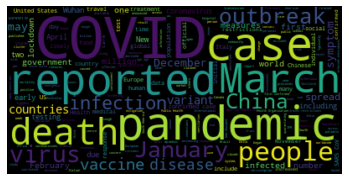

In [ ]:
from wordcloud import WordCloud
import wikipedia

# Getting wikipedia contents of "COVID-19_pandemic"
text = wikipedia.page("COVID-19_pandemic").content

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Try more word cloud examples: [Link](https://amueller.github.io/word_cloud/auto_examples/index.html)

# Saving and Loading Models

Training a model takes time. Once it is trained it is useful to save it. Then when you, or someone else, wants to use it you can just reload it.

**Saving a Pytorch model**

In [ ]:
# Let's train a model first
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, input):
        output = self.linear(input)
        return output

no_of_epochs = 500
display_interval = 20
learning_rate=0.01

# training data
x_training = np.asarray([[1],[2],[5],[8],[9],[12],[14],[16],[18],[20]])
y_training = np.asarray([100,200,501,780,901,1201,1399,1598,1800,2000])

x_data_torch = torch.from_numpy(x_training).float()
y_data_torch = torch.from_numpy(y_training).float() 

model = TheModelClass()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(no_of_epochs):

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(x_data_torch)
    loss = torch.sum(torch.pow(outputs-y_data_torch.view(-1,1),2))/(2*x_training.shape[0])
    loss.backward()
    optimizer.step()

    if epoch%display_interval == display_interval-1:
        print('Epoch: %d, loss: %.3f' %(epoch + 1, loss.item() ))

Epoch: 20, loss: 29.345
Epoch: 40, loss: 28.246
Epoch: 60, loss: 27.257
Epoch: 80, loss: 26.365
Epoch: 100, loss: 25.563
Epoch: 120, loss: 24.840
Epoch: 140, loss: 24.188
Epoch: 160, loss: 23.602
Epoch: 180, loss: 23.074
Epoch: 200, loss: 22.598
Epoch: 220, loss: 22.170
Epoch: 240, loss: 21.784
Epoch: 260, loss: 21.436
Epoch: 280, loss: 21.123
Epoch: 300, loss: 20.841
Epoch: 320, loss: 20.587
Epoch: 340, loss: 20.359
Epoch: 360, loss: 20.153
Epoch: 380, loss: 19.967
Epoch: 400, loss: 19.800
Epoch: 420, loss: 19.650
Epoch: 440, loss: 19.514
Epoch: 460, loss: 19.392
Epoch: 480, loss: 19.282
Epoch: 500, loss: 19.183


In [ ]:
# Now we save the trained model to the file named 'filename.pt', you can name it based upon your needs
torch.save(model, 'filename.pt')

**Loading model**

**IMPORTANT NOTE**: Before loading the saved PyTorch model by using *torch.load(model_file_name)*, you have to make sure you have already run the code for defining the model class (e.g. the *TheModelClass* in the above section for this sample code). You can try to restart the runtime and then directly load the model to see the error.

In [ ]:
#  Load the saved model from the .pt file
the_saved_model = torch.load('filename.pt')
the_saved_model.eval()

TheModelClass(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# Use the loaded model to do prediction
prediction = the_saved_model(x_data_torch).detach().numpy()
for i in range(len(y_training)):
    print('X: %d, Y_true: %d, Y_predict: %.3f'%(x_training[i][0],y_training[i],prediction[i][0]))

X: 1, Y_true: 100, Y_predict: 99.699
X: 2, Y_true: 200, Y_predict: 199.591
X: 5, Y_true: 501, Y_predict: 499.270
X: 8, Y_true: 780, Y_predict: 798.949
X: 9, Y_true: 901, Y_predict: 898.842
X: 12, Y_true: 1201, Y_predict: 1198.521
X: 14, Y_true: 1399, Y_predict: 1398.307
X: 16, Y_true: 1598, Y_predict: 1598.093
X: 18, Y_true: 1800, Y_predict: 1797.878
X: 20, Y_true: 2000, Y_predict: 1997.664


**How to Save (Upload) the model to your Google Drive**

As we know, once the session disconnects in Colab, all the files will be lost. Don't worry, we can save our model file to Google Drive so that we can download and and use it across sessions. 

There are various ways to upload the files on Google Drive.

[This tutorial](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH) will guide you how to save the files on your Google Drive.

1.   Mounting Google Drive locally
2.   Create a new Drive file

And we've already experienced multiple times for downloading the files from Google Drive (Refer to the Download Dataset section in this Lab5).

# Bi-LSTM with Hidden State Extraction

The folllowing image represents a Bi-LSTM for an N to 1 task. In an N to 1 task, it is usually required to extract the last hidden states of the forward LSTM and the backward LSTM and combine (**concat**) them. (Please check the lecture 5 recording, please! We also practised in Lab4 already with Bi-RNN.)

Bi-LSTM: Bidirectional LSTM, which means the signal propagates backward as well as forward in time.


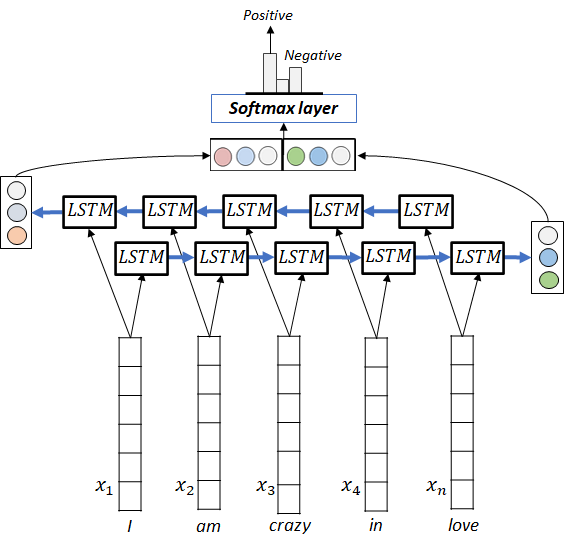




## nn.Embedding
In Lab4 Section *Text Classification using Bi-RNN*, we provide the embeddings for each token in each sentence (Check Lab4 Extension). These are constructed by the pre-trained word embedding model. For example, if the sequence length of the corpus is 8 (think about why we want a uniform sequence length for the whole dataset), the embedding for the sentence "i am crazy in love" should be:
- $[W_{i}, W_{am}, W_{crazy}，W_{in}, W_{love}, W_{[PAD]}, W_{[PAD]}, W_{[PAD]}]$  (if you choose post-padding)

 or

- $[W_{[PAD]}, W_{[PAD]},W_{[PAD]}, W_{i}, W_{am}, W_{crazy}，W_{in}, W_{love}]$ (if you choose pre-padding).

Therefore, after getting the embedding of each sentence, you will get a tensor with the shape of (train_size, seq_length, emb_dimension). However, if these three values (train_size, seq_length, emb_dimension) are too large, you might get an Out-Of-Memory(OOM) problem due to limited CPU/GPU.

One solution is to use **[nn.Embedding](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)** from PyTorch as a lookup table to get the embedding for each token/word during the training process instead of generating them all beforehand.




### Create the lookup table for the vocabulary using pretrained word embeddings

First, we will create a lookup table for our vocabulary, which will be used later to initialize the nn.Embedding (See the follow-up Modeling and Training section).  We will use two pre-trained embeddings and concatenate them in the lookup table so that we can use the concatenated embeddings to represent each word in the sentence. 

In [ ]:
# Let's create some toy data for sentiment analysis
# We will just use all the data to focus on the training only
sentences = [['i','like','that'],
             ['i','love','it'],
             ['i','hate','that'],
             ['i','do','not','like','it']]
labels = ["Positive","Positive","Negative","Negative"]

In [ ]:
# Get the vocabulary list from the training data for creating the lookup table later
# In practice, we only use the vocabulary from training data
word_set = set() 
for sent in sentences:
    for word in sent:
        word_set.add(word)

# Normally we add the special tokens for representing the padding and unknown words separately
# Sometimes we can also use same token to present padding and unknown words if we don't have to differentiate them
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set) 

# Although in some python versions, converting a set to list will return a ordered result, 
# It is still highly recommended that you sort this list to ensure the reproducibility of your code
word_list.sort()
print(word_list)

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1
print(word_index)

['[PAD]', '[UNKNOWN]', 'do', 'hate', 'i', 'it', 'like', 'love', 'not', 'that']
{'[PAD]': 0, '[UNKNOWN]': 1, 'do': 2, 'hate': 3, 'i': 4, 'it': 5, 'like': 6, 'love': 7, 'not': 8, 'that': 9}


In [ ]:
# Download the first Pre-trained Embedding
import gensim.downloader as api
word_emb_model = api.load("glove-twitter-25")

# Create the Embedding lookup table for the first pre-trained embedding
import numpy as np
emb_dim = word_emb_model.vector_size

emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model:
        emb_table.append(word_emb_model[word])
    else:
        # The pretrained glove twitter does not contain the embeddings for the [PAD] and [UNKNOWN] tokens we defined
        # Here, we just use all 0 for both [PAD] and [UNKNOWN] tokens for simplicity
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
    
# print(emb_table)

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
# Download another pre-trained word embedding
word_emb_model2 = api.load("glove-twitter-50")

emb_dim = word_emb_model.vector_size+word_emb_model2.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model:
        emb_table.append(np.concatenate((word_emb_model[word],word_emb_model2[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)

[==================================================] 100.0% 199.5/199.5MB downloaded


### Input preparation and setup

In [ ]:
# Convert the sentences to the word index that aligns with the lookup table
len_list = [len(s) for s in sentences]
seq_length = max(len_list)

# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded = encode_and_add_padding(sentences, seq_length, word_index)
print(sent_encoded)

[[4, 6, 9, 0, 0], [4, 7, 5, 0, 0], [4, 3, 9, 0, 0], [4, 2, 8, 6, 5]]


In [ ]:
# LabelEncoder can help us encode target labels with a value between 0 and n_classes-1.
# Details can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder

lEnc = LabelEncoder()
lEnc.fit(labels)
label_encoded= lEnc.transform(labels)

print(label_encoded)

[1 1 0 0]


In [ ]:
# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.01
total_epoch = 10

10


### Modeling and Training

Now, we can initialize the nn.Embedding using the lookup table we created above.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

    print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')




Epoch: 1, loss: 0.74230, train_acc: 0.50
Epoch: 2, loss: 0.64616, train_acc: 0.50
Epoch: 3, loss: 0.54852, train_acc: 0.75
Epoch: 4, loss: 0.47430, train_acc: 0.75
Epoch: 5, loss: 0.40185, train_acc: 0.75
Epoch: 6, loss: 0.30695, train_acc: 1.00
Epoch: 7, loss: 0.24170, train_acc: 1.00
Epoch: 8, loss: 0.16088, train_acc: 1.00
Epoch: 9, loss: 0.09567, train_acc: 1.00
Epoch: 10, loss: 0.05354, train_acc: 1.00
Finished Training


In [ ]:
# You can check whether model.emb.weight changed
# You can also try to comment self.emb.weight.requires_grad = False and then train the model and check again
# print(model.emb.weight)

#Build a simple user interface

When we have a well trained model ready to be used by others, it would be wonderful to have a friendly user interface instead of aking users to enter the input in the code fields. In colab, we can simply build up a user interface via the build-in ***Form Fields*** (Actually, we've already experienced the text fields in Lab1 E1 and different types of fieds in Lab2)

In this section, we will focus on practising how to build a simple user friendly interface for retrieving the most similar word for the query word from a trained Word2Vec model. Let's just use the Gensim Word2Vec CBOW model from Lab2.

## Train word embeddings via Gensim Word2Vec model

In [ ]:
## Download the corpus - TED scripts

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1B47OiEiG2Lo1jUY6hy_zMmHBxfKQuJ8-'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ted_en-20160408.xml')  

In [ ]:
## Process and prepare the data for word2vec model training

import re
from lxml import etree 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import Word2Vec

targetXML=open('ted_en-20160408.xml', 'r')

# Getting contents of <content> tag from the xml file
target_text = etree.parse(targetXML)
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# Removing "Sound-effect labels" using regular expression (regex) (i.e. (Audio), (Laughter))
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# Tokenising the sentence to process it by using NLTK library
sent_text=sent_tokenize(content_text)

# Removing punctuation and changing all characters to lower case
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# Tokenising each sentence to process individual word
sentences=[]
sentences=[word_tokenize(sentence) for sentence in normalized_text]

# Prints only 10 (tokenised) sentences
print(sentences[:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new'], ['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation'], ['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing'], ['consider', 'facit'], ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'], ['facit', 'was', 'a', 'fantastic', 'company'], ['they', 'were', 'born', 'deep', 'in', 'the', 'swedish', 'forest', 'and', 'they', 'made', 'the', 'best', 'mechanical', 'calculators', 'in', 'the', 'world'], ['everybody', 'used', 'them'], ['and', 'what', 'did', 'facit', 'do', 'when', 'the', 'electronic', 'calculator', 'came', 'along'], ['they', 'continued', 'doi

In [ ]:
# Train the Word2Vec embedding model - CBOW

wv_cbow_model = Word2Vec(sentences=sentences, size=100, window=5, min_count=5, workers=4, sg=0)

## Simple user interface for the Gensim Word2Vec model

In [ ]:
#@title Semantic Synonym Dictionary
#@markdown Please input the word you want to find the synonym for in the following field:

#@markdown ---
Word = 'lucky'  #@param {type: "string"}

#@markdown ---

# Find the most similar word by using the word2vec gensim CBOW model we jsut trained above
try:
    similar_words=wv_cbow_model.wv.most_similar(Word)
    print("The semantic synonym for "+Word+" is: "+similar_words[0][0])
except:
    print("Unfortunately, the word you entered is not in our dictionary. Please try another one and good luck!")

The semantic synonym for lucky is: fortunate


# Exercise

## E1. Briefly explain the reason/intuition of two facts individually.
*   The intuition of using sigmoid in the forget gate of LSTM
*   The intuition of using tanh in the RNN


Please write down your answer below in your own words with **examples**

Your answer:

## E2. Preprocessing and Model Saving
In this exercise, we will implement a simple sentiment analysis model on a Large Movie Review Dataset named IMDB. As is illustrated in the figure below from the Lecture 5 slides, we normally use the last hidden state from a single-directional RNN/LSTM for final classification over the sequence.

You are required to preprocess the train and test data, apply different pre-trained embeddings, save and load your trained model. You need to complete the section we tagged as **'[complete this section][TO DO]'. PLEASE!!! PLEASE!!!! READ THE COMMENT IN EACH CODE BLOCK**

**Note**: We will NOT mark your exercise based on the test set performance. We will only check whether the preprocessing part, embedding part and model saving and loading part are correct.

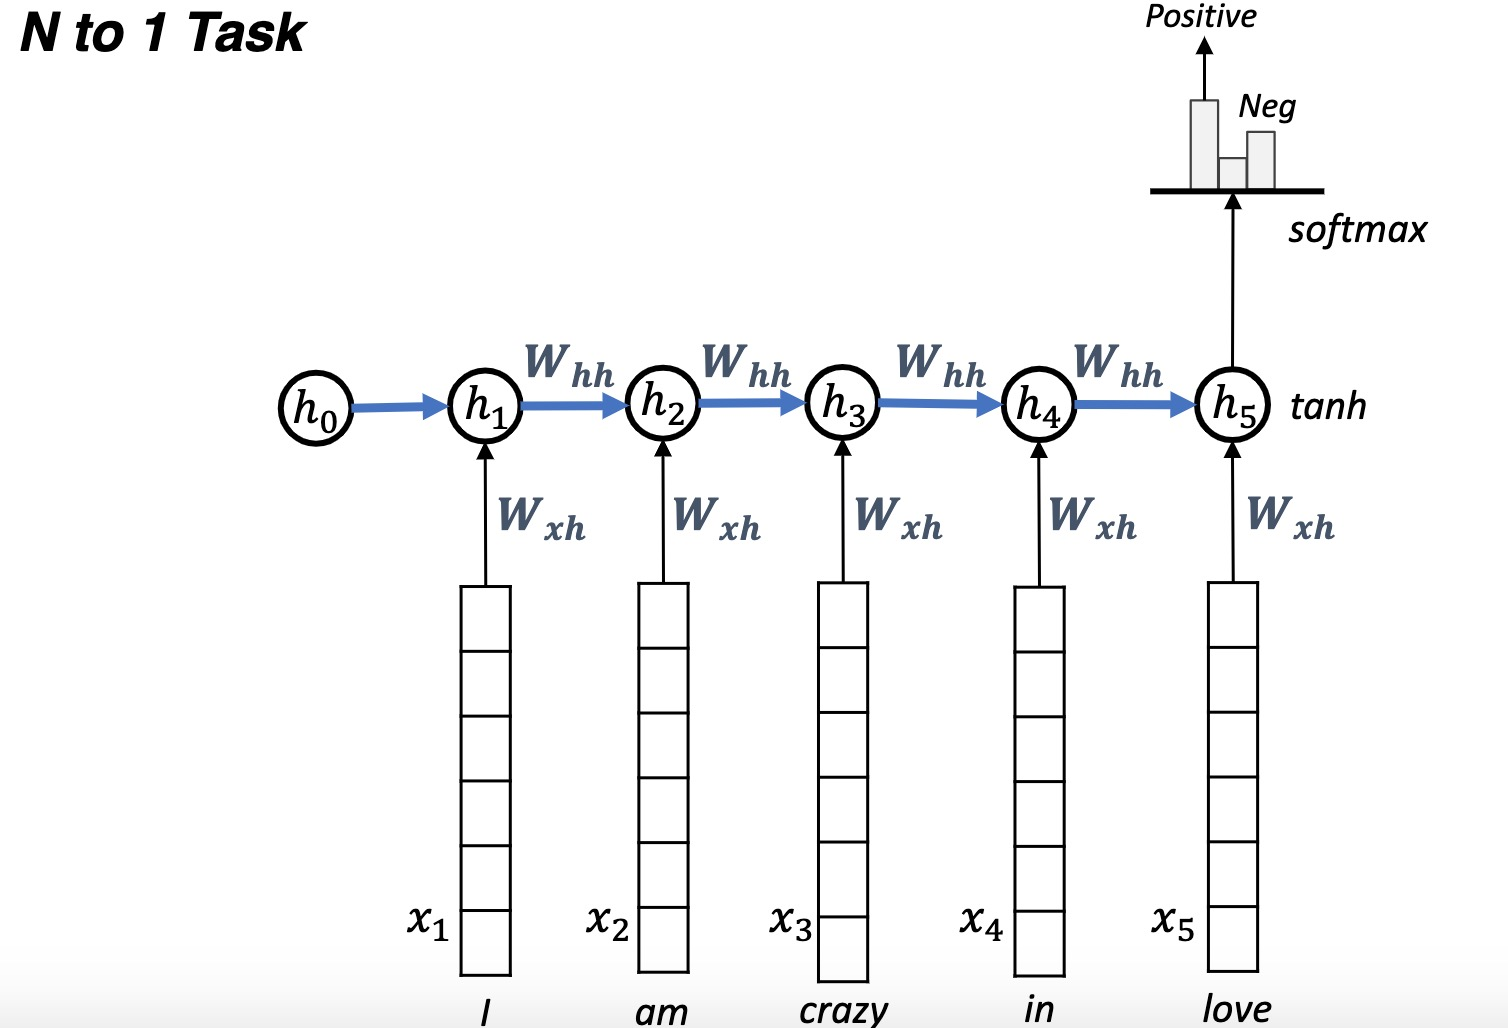





In [ ]:
import torch
# You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Download Dataset

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1vF3FqgBC1Y-RPefeVmY8zetdZG1jmHzT'

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('imdb.csv')

import pandas as pd
df = pd.read_csv("imdb.csv")
df_pick = df.sample(4000,random_state=24)

raw_text = df_pick["review"].tolist()
raw_label = df_pick["sentiment"].tolist()

from sklearn.model_selection import train_test_split
text_train,text_test,label_train,label_test = train_test_split(raw_text,raw_label,test_size=0.25,random_state=42)

### Preprocessing [Complete this section]

####**Case Folding**

In [ ]:
text_train = [s.lower() for s in text_train]
text_test = [s.lower() for s in text_test]

####**Remove punctuations [Please complete this section]**

In [ ]:
import re
def remove_punctuation_re(x):
    # [TODO] Please complete this function
    return x
    
text_train = [remove_punctuation_re(s) for s in text_train]
text_test = [remove_punctuation_re(s) for s in text_test]

####**Tokenization [Please complete this section]**

In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

# [TODO] Please complete the following code
text_train = 
text_test = 

####**Remove stopwords [Please complete this section]**

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop_words = sw.words()

text_train_ns=[]
for tokens in text_train:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_train_ns.append(filtered_sentence)

text_test_ns=[]
for tokens in text_test:
    # [TODO] Please complete this code body 

####**Lemmatisation [Please complete this section]**

In [ ]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

text_train_le = []
for tokens in text_train_ns:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    text_train_le.append(lemma_sentence)

text_test_le = []
for tokens in text_test_ns:
    # [TODO] Please complete this code body


####**Label Encoding [Please complete this section]**

In [ ]:
import numpy as np

from sklearn.preprocessing import LabelEncoder

unique_labels = np.unique(label_train)

lEnc = LabelEncoder()
# [TODO] Please encode the labels (Do NOT add new lines of code in this section)
# Hint: Try to understand the difference between fit_transform and transform
label_train_encoded = 
label_test_encoded = 

n_class = len(unique_labels)
print(unique_labels)
print(lEnc.transform(unique_labels))

### Embeddings [Complete this section]

####**Get Word List**

In [ ]:
word_set = set() 
for sent in text_train_le:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set) 
word_list.sort()
print(word_list)

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1
print(word_index)

#### **Download Pre-trained Embeddings [Please complete this section]**

You can find the details from https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api
# [TODO] Please load the pretrained embedding
word_emb_model = api.load("xxx") # NOTE: Download an embedding other than glove-twitter-25

#### **Embedding lookup table**

In [ ]:
# Get the Embedding lookup table
import numpy as np
emb_dim = word_emb_model.vector_size

emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model:
        emb_table.append(word_emb_model[word])
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

#### **Padding and encoding [Please complete this section]**

In [ ]:
# The sequence length is pre-defined, you can't change this value for this exercise
seq_length = 16

# [TODO] Please Complete the function below
# Hint: You should pay attention to: (1) if the sentence length > seq_length (2) if the word not in word_index dictionary
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []

    return sent_encoded

train_pad_encoded = encode_and_add_padding(text_train_le, seq_length, word_index )
test_pad_encoded = encode_and_add_padding(text_test_le, seq_length, word_index )

### Model [Complete this section]


In [ ]:
vocab_size = len(word_list)
total_epoch = 100
learning_rate = 0.01

In [ ]:
import torch
# You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        # [TODO] Define a Single Directional LSTM Layer, hidden dimenstion is 50

        self.lstm = 
        # [TODO] Define the Linear Layer
        
        self.linear = 

    def forward(self, x):
        # [TODO] Define your forward function


model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

input_torch = torch.from_numpy(np.array(train_pad_encoded)).to(device)
target_torch = torch.from_numpy(np.array(label_train_encoded)).view(-1).to(device)


for epoch in range(total_epoch):  
    
    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    
    if epoch%10 == 9:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')


### Save and Load the model [Complete this section]

**Save the model [Complete this part]**

In [ ]:
# [TODO] please save your trained model, which then can be loaded by the follow-up code cell



**Load the model**

In [ ]:
# Load the model you just saved in above code cell
model2 = torch.load('lab5.pt')
model2.eval()

### Testing

In [ ]:
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)

outputs = model2(input_torch) 
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
print(classification_report(label_test_encoded,predicted.cpu().numpy()))

Sample output for the above code cell (Only for Format reference). **Note**: Please make sure you have the output saved in your log in your submission file.




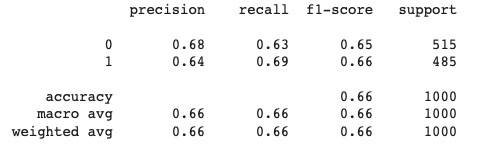